https://www.researchgate.net/publication/286110673_The_discrete_variable_representation_method_for_bound_state_eigenvalues_and_eigenfunctions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
import scipy
from scipy import interpolate
from scipy import integrate
N = 7500 # number of iterator steps
H_to_K = 1/0.000003166808534191

## Q's
### 1.) Where do I pick wave number k in the delta formula, assume k(rmax) since that is the place where the u(r) = sin(kr + delta) approx holds
### 2.) What does left wall of the the LJ pot look like, an infinite wall, finite but large wall, something else? Do BC's change? Do I set u(r) = 0 for all r < rmin st V(rmin) > 0. Does u(r) look like decaying expoential at boundary (how it is now) or look 0 at rmin
### 3.) What is an appropriate energy range to look at, check this

# Goals
### 1.) Converge delta wrt r1, r1 being minimum positive r to start at
### 2.) Coverge delta wrt r2, r2 being max value of r to iterate out to
### 3.) Coverge delta wrt dr, step size, (20 setps per deBroglie wavelength

# $V(r) = \frac{C_{12}}{r^{12}} - \frac{C_{6}}{r^{6}}$
## $C_{12} = 3.05\times10^{8} E_{h}a_{0}, C_{6} = 4710 E_{h}a_{0}$

 dr = 0.007467662354980753
-5741.955799772744


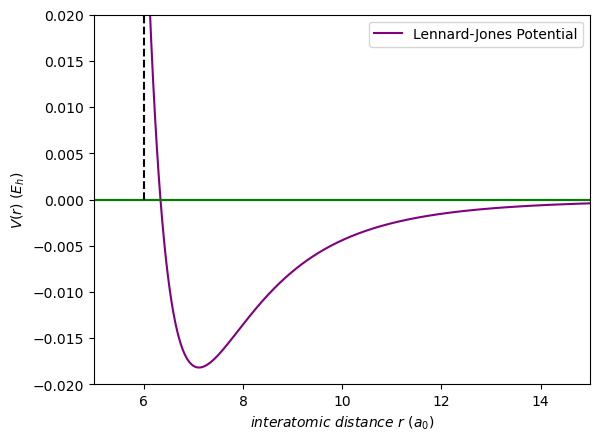

In [6]:
tol = 1e-4
r = np.linspace(4,60, N) # range of r values to iterate over, 4 -> 60 Bohr radii
#r_pot = np.linspace(4,60, N) # range of r values to iterate over, ~0 -> 60 Bohr radii
dr = r[1] - r[0] # spacing dr
print(f' dr = {dr}')
psi = np.zeros(N)  # Initializing psi(r) as array of zeros

C12 = 3.05e8 #C12 coefficient in Eh*ao
C6 = 4710 #C6 coefficient in Eh*ao
Vr = (C12/(r**12)) - (C6/(r**6))
Eo = 1e5*3.166808534191e-12 # inital particle energy, 1uK in Hartrees
me = 9.1093837e-28 # electron mass in grams
mrb_g = 1.4192261e-22 # rubidium mass in grams
mrb = mrb_g/me # rubidium mass in au
mu = (mrb**2)/(2*mrb) # reduced mass of rubidium
hbar = 1.0546e-27 # reduced Planck constant in cgs
e = 4.8032e-10 # electron charge in cgs
ao = (hbar**2)/(me*e**2) # Bohr radius in cgs


#print(f' mu = {mu}')
plt.plot(r, Vr, label = 'Lennard-Jones Potential', color = 'purple')
plt.hlines(0,0, max(r), color = 'black')
plt.hlines(Eo,0, max(r), color = 'green')
plt.vlines(6, 0, max(r), color = 'black', linestyle = 'dashed')
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{0})$')
plt.ylabel('$V(r)$ $(E_{h})$')
plt.ylim(-0.02, 0.02)
plt.xlim(5,15)
plt.legend()

print(min(Vr)*H_to_K)


## $\psi(r_{n+1}) = \frac{2(1-\frac{5}{12}(dr)^2k^2_{n})\psi_{n} - (1 + \frac{1}{12}(dr)^2k^2_{n-1})\psi_{n-1}}{1 + \frac{1}{12}(dr)^2k^2_{n+1}}    $

In [8]:
def wavefunction(Energy, N): # function to find psi(r)
    psi[0] = 0 # impose boundary condition psi(0) = 0
    psi[1] = dr # let psi(1) = the spacing length
    #print(f' psi[1] = {psi[1]}')
    ksq = 2*mu*(Energy - Vr) # wave number squared for the energy

    for i in range(2,N):  # Numerov Algorithm, range is 2 -> N since psi(0), psi(1) already set
        #if i < 100:
         #   print(f' first term in numerator is {(2*(1 - (5/12)*(dr**2)*k[i-1])*psi[i-1])}')
        psi[i] = ((2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1]) - ((1 + (1/12)*(dr**2)*ksq[i-2])*psi[i-2]))/(1 + (1/12)*(dr**2)*ksq[i])
    Psi_f = psi/max(psi)
    

            
    return Psi_f

In [9]:
Psi_1 = wavefunction(Eo, N)
psi_1prime = np.gradient(Psi_1, r_pot)
plt.plot(r, Psi_1, label = f' $\\psi(r)$', color = 'red') 
#plt.plot(r, Vr*1e0, label = 'Scaled Lennard-Jones Potential', color = 'purple')
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{o})$')
plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')
plt.legend()

#plt.xlim(5,7)
#print(ksq[0:100])
#print(Psi_1[0:100])

NameError: name 'r_pot' is not defined

In [ ]:
3iun2i 12

### $\psi(r) = sin(kr + \delta), \frac{d\psi}{dr} = kcos(kr + \delta)$
### $\frac{\psi}{\frac{d\psi}{dr}} = \frac{1}{k}tan(kr + \delta)$
### $tan^{-1}(\frac{k\psi_{n}}{\frac{d\psi_{n}}{dr}}) = kr + \delta$
### $\delta = tan^{-1}(\frac{k\psi_{n}}{\frac{d\psi_{n}}{dr}}) - kr $

In [ ]:
ko = np.sqrt(2*mu*(Eo - Vr))
delt = np.arctan((np.sqrt(ko)*Psi_1)/(psi_1prime)) - np.sqrt(ko)*r
plt.plot(r, delt, color = 'black', label = '$\\delta$')
plt.ylabel('$\\delta$')
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{o})$')
plt.legend()



### $\delta = tan^{-1}(\frac{k\psi_{n}}{\frac{d\psi_{n}}{dr}}) - kr $

## Method A: find delta by indexing last entry of k(r), last index of delta
### Main loop

In [ ]:
E = np.linspace(3.166808534191e-15, 0.000003166808534191, N) # particle energy from 1nK -> 1K in au
Delta_numeric = []
knsq = []
as_delta = []
for j in range(N):
    for i in range(N):
        ksq = 2*mu*(E[i] - Vr)
        knsq.append(ksq[-1])
        PSI = wavefunction(E[i],N) # wave function to find using Numerov
        PSI_prime = np.gradient(PSI, r) # find derivative of PSI Numerov
        Delta = np.arctan((np.sqrt(ksq)*PSI)/(PSI_prime)) - np.sqrt(ksq)*r
        Delta_numeric.append(Delta[-1])
        as_delta.append(Delta_numeric[-1]/np.sqrt(knsq[-1]))
    

In [ ]:
plt.plot(np.sqrt(knsq), Delta, color = 'yellow', label = f'$\\delta$')
plt.xlabel('$wave$ $number$ k(E) $m^{-1}$')
plt.ylabel('$phase shift$ $\\delta$')
plt.legend()
#print(knsq)

as_delta = []
for i in range(0):
    as_delta.append(Delta_numeric[i]/np.sqrt(knsq[i]))

In [ ]:
plt.plot(np.sqrt(knsq), Delta, color = 'yellow', label = f'$\\delta$')
plt.xlabel('$wave$ $number$ k(E) $m^{-1}$')
plt.ylabel('$phase shift$ $\\delta$')
#print(knsq)

as_delta = []
correct_count = []
diff_count = []
for i in range(100):
    as_delta.append(Delta_numeric[i]/np.sqrt(knsq[i]))

plt.xlim(0.4, 0.5)
plt.ylim(-100, -30)

In [ ]:
plt.plot(E, as_delta)

## $ -\frac{1}{a_{s}} =   \ lim_{k \to 0} (kcot\delta)$


## $a_{s} =  \sqrt{\frac{\sigma}{\pi}}$ given $(E\ll Vo)$
## $\delta = k(r)a_{s}$ given $(E\ll Vo)$

## $\sigma = \frac{\pi}{k^2} sin^2(\delta)$

In [ ]:
E = np.linspace(3.166808534191e-15, 0.000003166808534191, N) # # particle energy from 1nK -> 1K in au
Delta_numeric = []
knsq = []

for i in range(N):
    
    ksq = 2*mu*(E[i] - Vr)
    knsq.append(ksq[-1])
    PSI = wavefunction(E[i],N) # wave function to find using Numerov
    PSI_prime = np.gradient(PSI, r) # find derivative of PSI Numerov
    Delta = np.arctan((np.sqrt(ksq)*PSI)/(PSI_prime)) - np.sqrt(ksq)*r
    Delta_numeric.append(Delta[-1])

In [ ]:
Sigma = []
Sig_approx = (np.pi*(a_delta[0])**2)*ao**2
print(f'Low energy limit sigma = {Sig_approx} cm^2')
for i in range(N):
    sig = (np.pi/knsq[i])*((np.sin(Delta_numeric[i]))**2)
    Sigma.append(sig*ao**2)


plt.loglog(E*H_to_K, Sigma, color = 'tan', label = '$\\sigma$') 
plt.hlines(Sig_approx, min(E), max(E), color = 'black', linestyle = 'dashed')
plt.ylabel(f'$\\sigma$ ($cm^2$)')
plt.legend()
plt.xlabel('particle energy (K)')

print(max(Sigma))
as_sigma = np.sqrt(Sigma/np.sqrt(knsq))